# Quantum teleportation

- **Type:** protocol
- **Difficulty:** easy
- **Keywords:** entanglement, quantum communication

## Description

Quantum teleportation is a protocol where a sender (Alice) transmits a quantum state to a receiver (Bob). The protocol requires Alice and Bob share a pair of entangled qubits, and that Alice can send two classical bits to Bob.

Qubits are fragile, which makes sending physical qubits between locations difficult. Rather than send the physical system (such as a trapped ion or supercooled circuit) that holds the quantum state, the teleportation protocol erases the quantum state from Alice's system and recreates it on Bob's system. The original state must be erased as it's impossible to copy quantum states (see the no-cloning theorem).

The protocol can send any quantum state, including states entangled with other quantum systems. Alice and Bob don't need to know anything about the state they're sending.

### Setup

Alice has a qubit $\mathsf{Q}$ that holds the state she wants to send. For the protocol, Alice and Bob must share an e-bit: Alice holds a qubit $\mathsf{A}$, Bob holds a qubit $\mathsf{B}$, and together the pair $(\mathsf{A},\mathsf{B})$ is in the state 

$$
\vert\phi^+\rangle = \frac{1}{\sqrt{2}} \vert 00\rangle + \frac{1}{\sqrt{2}} \vert 11\rangle.
$$

A third party could create this e-bit and distribute the qubits to Alice and Bob.



### Protocol

The following quantum circuit diagram describes the teleportation protocol.

![Circuit diagram with three qubit wires: "Q", "A", and "B". Alice performs a CNOT operation controlled by Q with target A. Alice then performs a Hadamard gate on Q. Alice measures Q and A, and sends the measurement bits to Bob. Bob performs an X-gate if the measurement result of A is 1, followed by a Z-gate if the measurement result of Q is 1. Qubit B now holds the quantum state that qubit Q started with.](images/teleportation.png)

## Explanation


A qubit in a pure state can be described by two values:
 - The probability of the qubit being 1 (it's Z-axis expectation value)
 - The relative phase between the $|0\rangle$ and $|1\rangle$ states (related to it's X-axis expectation value)

To avoid destroying the quantum state through measurement, the protocol uses the e-bit as a secret key to encrypt $|\psi\rangle$. First, we'll see how the protocol "teleports" the classical probability (that is, it's Z-axis expectation value). If it helps, for this step, you can consider each qubit to be in a classical state.

Say $\mathsf{Q}$ has initial value $x$, and $\mathsf{A}$ and $\mathsf{B}$ both have initial value $y$. When Alice performs the CNOT gate, the value of $\mathsf{A}$ becomes $x \oplus y$. Alice can now safely measure $\mathsf{A}$ because the measurement result doesn't tell us anything about $x$; it's encrypted by the secret key $y$. When Bob XORs $\mathsf{B}$ with this measurement result, the value of $\mathsf{B}$ becomes $x \oplus y \oplus y = x$. Bob has decrypted $x$ and stored it to $\mathsf{B}$. This logic also holds if $x$ is a probabilistic state.

So far, this protocol is identical to a classical encryption protocol called the _one-time pad._ Unlike the one-time pad (where only trusted people can know the secret key), in quantum teleportation, there must be _no way of knowing_ what the secret key is. The next step extends the protocol to work for quantum states too.

To teleport the phase, Alice first needs to encrypt it as she did with the classical probability. Fortunately, the CNOT gate also does this. This effect is easier to see when writing $|\phi^+\rangle$ as $\tfrac{1}{\sqrt{2}}(|{+}{+}\rangle + |{-}{-}\rangle)$; phase kickback will flip the phase of $\mathsf{Q}$ if $\mathsf{A}$ is $|{-}\rangle$, and do nothing if $\mathsf{A}$ is $|{+}\rangle$. When Alice performs a H-gate and measures $\mathsf{Q}$, she is measuring the relative phase of $|\psi\rangle$, encrypted by the phase of $\mathsf{A}$'s initial state. Since we know $\mathsf{B}$ must have the same initial phase as $\mathsf{A}$, Bob can use Alice's measurement to fully recreate $|\psi\rangle$ on qubit $\mathsf{B}$.

## Proof for pure states

If the qubit $\mathsf{Q}$ begins the protocol in the state $\alpha\vert 0\rangle + \beta\vert 1\rangle,$ the state of the three qubits $(\mathsf{B},\mathsf{A},\mathsf{Q})$ together at the start of the protocol is

$$
\vert \phi^+\rangle \otimes
\bigl(\alpha\vert 0\rangle + \beta\vert 1\rangle \bigr)
= \frac{\alpha \vert 000 \rangle + \alpha \vert 110\rangle + \beta \vert 001\rangle + \beta \vert 111\rangle}{\sqrt{2}}.
$$

After the controlled-NOT gate, the joint state is

$$
\frac{\alpha \vert 000 \rangle + \alpha \vert 110\rangle + \beta \vert 011\rangle + \beta \vert 101\rangle}{\sqrt{2}}.
$$

Then the Hadamard gate transforms the joint state into

$$
\begin{aligned}
&
\frac{\alpha \vert 00\rangle \vert + \rangle + \alpha \vert 11\rangle\vert +\rangle + \beta \vert 01\rangle\vert -\rangle + \beta \vert 10\rangle\vert -\rangle}{\sqrt{2}}\\[2mm]
& \qquad = \frac{\alpha \vert 000 \rangle
+ \alpha \vert 001 \rangle
+ \alpha \vert 110 \rangle
+ \alpha \vert 111 \rangle
+ \beta \vert 010 \rangle
- \beta \vert 011 \rangle
+ \beta \vert 100 \rangle
- \beta \vert 101 \rangle}{2}.
\end{aligned}
$$

We can also write this state as follows:

$$
\begin{aligned}
& \frac{1}{2} \bigl(\alpha\vert 0 \rangle + \beta \vert 1\rangle \bigr)\vert 00\rangle \\[1mm]
+ & \frac{1}{2} \bigl(\alpha\vert 0 \rangle - \beta \vert 1\rangle \bigr)\vert 01\rangle \\[1mm]
+ & \frac{1}{2} \bigl(\alpha\vert 1 \rangle + \beta \vert 0\rangle \bigr)\vert 10\rangle \\[1mm]
+ & \frac{1}{2} \bigl(\alpha\vert 1 \rangle - \beta \vert 0\rangle \bigr)\vert 11\rangle.
\end{aligned}
$$

Now let's consider the four possible outcomes of Alice's standard basis measurements, together with the actions that Bob performs as a result.

#### Possible outcomes

 - The outcome of Alice's measurement is $ab = 00$ with probability

   $$
   \Biggl\| \frac{1}{2}\bigl(\alpha \vert 0\rangle + \beta\vert 1\rangle\bigr) \Biggr\|^2 
   = \frac{\vert\alpha\vert^2 + \vert\beta\vert^2}{4} = \frac{1}{4},
   $$

   in which case the state of $(\mathsf{B},\mathsf{A},\mathsf{Q})$ becomes

   $$
   \bigl( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \bigr) \vert 00 \rangle.
   $$

   Bob does nothing in this case, and so this is the final state of these three qubits.

 - The outcome of Alice's measurement is $ab = 01$ with probability

   $$
   \Biggl\| \frac{1}{2}\bigl(\alpha \vert 0\rangle - \beta\vert 1\rangle\bigr) \Biggr\|^2 
   = \frac{\vert\alpha\vert^2 + \vert{-\beta}\vert^2}{4} = \frac{1}{4},
   $$

   in which case the state of $(\mathsf{B},\mathsf{A},\mathsf{Q})$ becomes

   $$
   \bigl( \alpha \vert 0 \rangle - \beta \vert 1 \rangle \bigr) \vert 01 \rangle.
   $$

   In this case Bob applies a $Z$ gate to $\mathsf{B},$ leaving $(\mathsf{B},\mathsf{A},\mathsf{Q})$ in the state

   $$
   \bigl( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \bigr) \vert 01 \rangle.
   $$

 - The outcome of Alice's measurement is $ab = 10$ with probability

   $$
   \Biggl\| \frac{1}{2}\bigl(\alpha \vert 1\rangle + \beta\vert 0\rangle\bigr) \Biggr\|^2 
   = \frac{\vert\alpha\vert^2 + \vert\beta\vert^2}{4} = \frac{1}{4},
   $$

   in which case the state of $(\mathsf{B},\mathsf{A},\mathsf{Q})$ becomes

   $$
   \bigl( \alpha \vert 1 \rangle + \beta \vert 0 \rangle \bigr) \vert 10 \rangle.
   $$

   In this case, Bob applies an $X$ gate to the qubit $\mathsf{B},$ leaving $(\mathsf{B},\mathsf{A},\mathsf{Q})$ in the state

   $$
   \bigl( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \bigr) \vert 10 \rangle.
   $$

 - The outcome of Alice's measurement is $ab = 11$ with probability

   $$
   \Biggl\| \frac{1}{2}\bigl(\alpha \vert 1\rangle - \beta\vert 0\rangle\bigr) \Biggr\|^2 
   = \frac{\vert\alpha\vert^2 + \vert{-\beta}\vert^2}{4} = \frac{1}{4},
   $$

   in which case the state of $(\mathsf{B},\mathsf{A},\mathsf{Q})$ becomes

   $$
   \bigl( \alpha \vert 1 \rangle - \beta \vert 0 \rangle \bigr) \vert 11 \rangle.
   $$

   In this case, Bob performs the operation $ZX$ on the qubit $\mathsf{B},$ leaving $(\mathsf{B},\mathsf{A},\mathsf{Q})$ in the state

   $$
   \bigl( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \bigr) \vert 11 \rangle.
   $$

We now see, in all four cases, that Bob's qubit $\mathsf{B}$ is left in the state
$\alpha\vert 0\rangle + \beta\vert 1\rangle$ at the end of the protocol, which is the initial state of the qubit $\mathsf{Q}.$
This is what we wanted to show: the teleportation protocol has worked correctly in the case at hand.

The analysis can be extended to the situation in which $\mathsf{Q}$ is initially entangled with one or more other systems.

## Qiskit implementation

The following cell creates a quantum circuit that carries out the teleportation protocol.

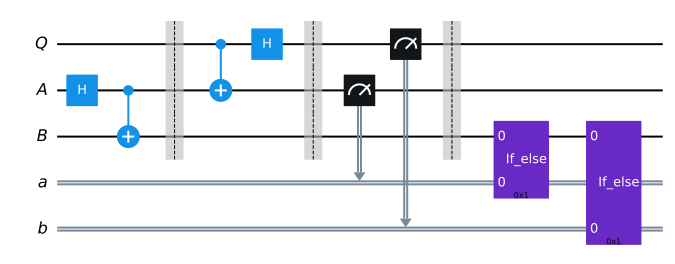

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# pylint: disable=invalid-name, not-context-manager
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

protocol.draw()

To test that the protocol works correctly, let's try teleporting an entangled qubit.

We'll create a circuit including a new qubit, $\mathsf{R}$, compose it with our protocol, and then add gates and measurements to perform the test.

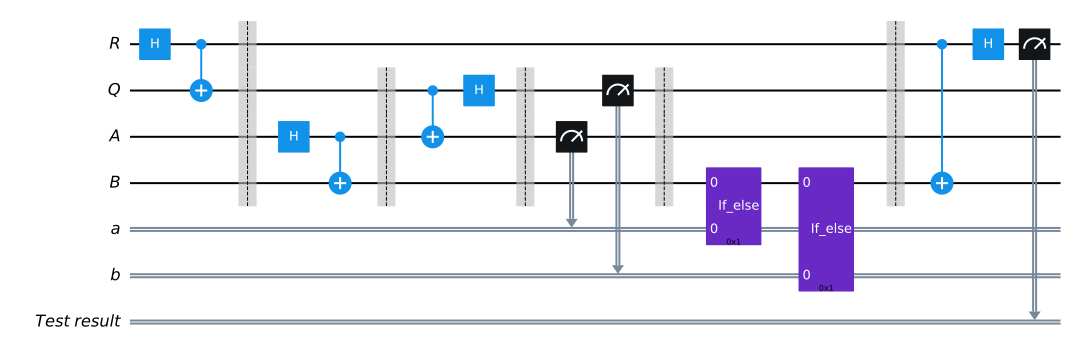

In [2]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol, along with a new "auxiliary" qubit R.
aux = QuantumRegister(1, "R")
test = QuantumCircuit(aux, qubit, ebit0, ebit1, a, b)

# Entangle Q with R
test.h(aux)
test.cx(aux, qubit)
test.barrier()

# Append the protocol the circuit. The "qubits" argument tells Qiskit that
# the protocol should operate on the qubits numbered 1, 2, and 3 (skipping
# qubit 0, which is R).
test = test.compose(protocol, qubits=[1, 2, 3])
test.barrier()

# After the protocol runs, check that (B,R) is in a phi+ state. We can add
# a new classical bit to the circuit to do this.
test.cx(aux, ebit1)
test.h(aux)
result = ClassicalRegister(1, "Test result")
test.add_register(result)
test.measure(aux, result)

test.draw()

Finally let's run this circuit on a simulator and plot a histogram of the outputs.
We'll see the statistics for all three classical bits:
the most significant (leftmost) bit should always be $0$, indicating that the qubit $\mathsf{Q}$ was successfully teleported to $\mathsf{B}$, while the other two bits should be roughly uniform.

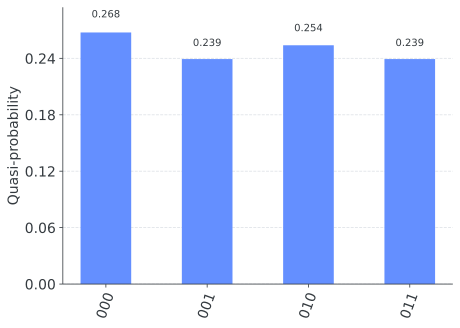

In [3]:
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram

counts = Sampler().run(test).result().quasi_dists[0].binary_probabilities()
plot_histogram(counts)

The following cell filters out the other qubits, leaving just the probabilities for the leftmost qubit.

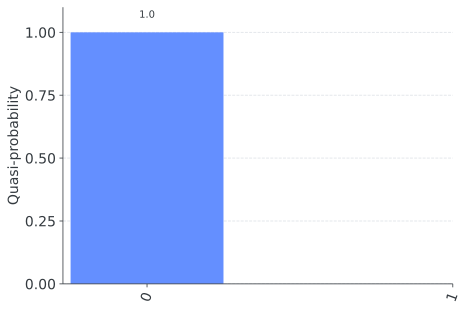

In [4]:
filtered_counts = {"0": 0, "1": 0}

for result, probability in counts.items():
    filtered_counts[result[0]] += probability

plot_histogram(filtered_counts)

The test qubit is $0$ every time, indicating that teleportation has worked correctly.

In [5]:
import qiskit.tools.jupyter
%qiskit_version_table